In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


Data Cleaning

In [2]:
# Load the dataset
file_path = '1.csv'  # Adjust file path as needed
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Step 1: Data Cleaning
# Convert 'Crash Date' to datetime and extract month, day, and year
data['Crash Date'] = pd.to_datetime(data['Crash Date'], errors='coerce')
data['Crash Month'] = data['Crash Date'].dt.month
data['Crash Day'] = data['Crash Date'].dt.day
data['Crash Year'] = data['Crash Date'].dt.year

# Convert 'Crash Time' to datetime to extract hour
data['Crash Time'] = pd.to_datetime(data['Crash Time'], format='%I:%M %p', errors='coerce')
data['Crash Hour'] = data['Crash Time'].dt.hour

# Fill missing values in categorical columns with 'Unknown' and convert all entries to strings
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna('Unknown').astype(str)

# Fill missing values for numeric columns with median values
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Drop unneeded columns after extracting useful data
data = data.drop(['Crash Date', 'Crash Time'], axis=1)

Seperate features and target

In [3]:

# Step 2: Encode Categorical Features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))  # Ensure all values are strings
    label_encoders[col] = le

# Step 3: Separate Features and Target
target = 'Crash Severity'  # Specify target variable
X = data.drop(columns=[target])  # Use all columns except 'Crash Severity' as features
y = data[target]


Decision Tree

In [4]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Decision Tree Model
model = DecisionTreeClassifier(max_depth=12, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=12, random_state=42)

Evaluation

Accuracy: 0.7386142564972316
Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.02      0.03        52
           1       0.46      0.13      0.20      4585
           2       0.76      0.95      0.84     14562
           3       0.72      0.50      0.59       848

    accuracy                           0.74     20047
   macro avg       0.53      0.40      0.42     20047
weighted avg       0.69      0.74      0.68     20047



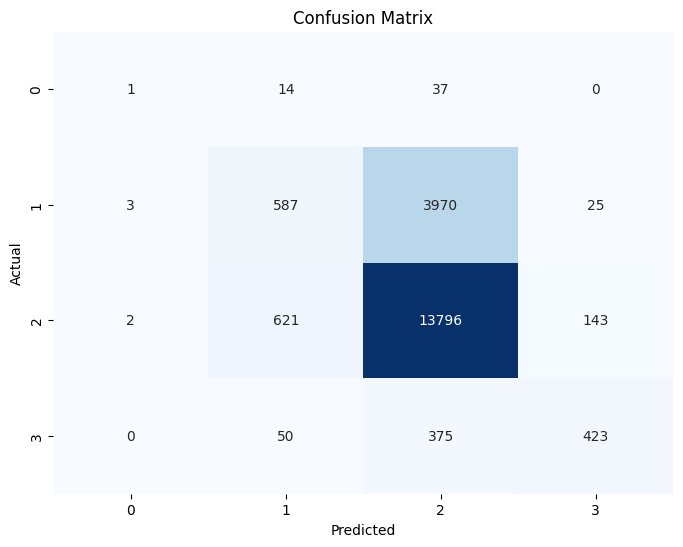

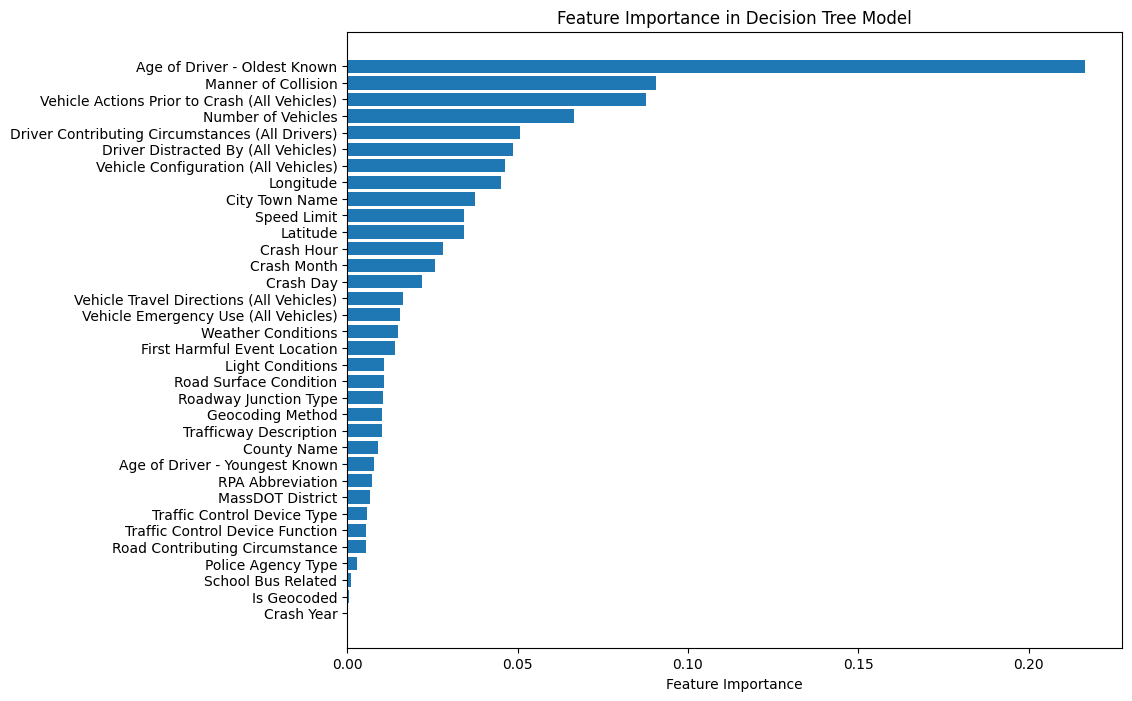

In [5]:
# Step 6: Evaluate the Model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 7: Feature Importance Plot
feature_importances = model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 8))
plt.barh(X.columns[sorted_indices], feature_importances[sorted_indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Decision Tree Model")
plt.gca().invert_yaxis()
plt.show()
